# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [30]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
# Your code here.
import pandas as pd

x_values=[17,51,27,21,36,48,19,26,54,30]
y_values= [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'Age':x_values, 'Tardies': y_values})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

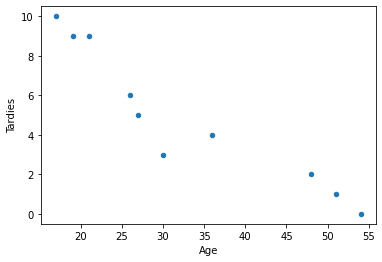

In [32]:
# Your code here.
student_data.plot.scatter(x='Age', y='Tardies')

plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [33]:
# Your response here. 

#It seems that the number of tardies declines as age increases (negative trend)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [34]:
# Your response here.
#1st Method

# correlation
correlation = student_data[['Age','Tardies']].corr()
print(correlation)

print("\n")

# covariance
covariance = student_data[['Age','Tardies']].cov()
print(covariance)

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


In [35]:
#2nd Method

import numpy as np

# correlation
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])[0,1]
print(correlation)

# covariance
covariance = np.cov(student_data['Age'], student_data['Tardies'])[0,1]
print(covariance)

-0.9391626886887122
-45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [36]:
# Your response here.


x = student_data[['Age']]
y = student_data['Tardies']

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


12.888803363135768

array([-0.24282077])

Plot your regression model on your scatter plot.

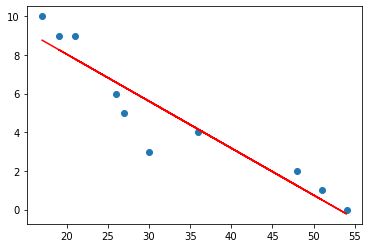

In [37]:
# Your code here.
plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [38]:
# Your response here.
from sklearn.metrics import mean_squared_error
display(mean_squared_error(result.predict(x),y))
display(result.score(x,y))

1.3319201847356268

0.8820265558250109

In [39]:
#Comments

#X explains 88,2% of the Y

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

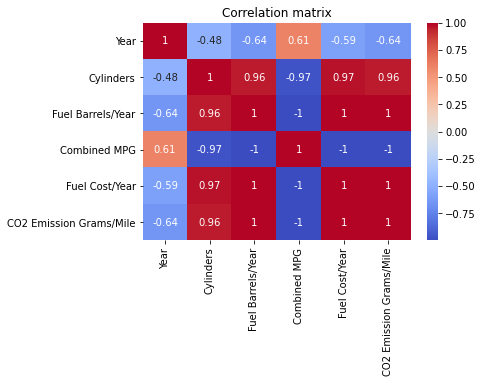

In [41]:
# Your response here. 
import seaborn as sns

# make the correlation matrix
correlation = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
#correlation = vehicles.corr()

sns.heatmap(correlation.corr(), cmap='coolwarm', annot = True)
plt.title('Correlation matrix')

plt.show()

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [42]:
# Your response here. 

y = vehicles['CO2 Emission Grams/Mile']

X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]


model = linear_model.LinearRegression()

result = model.fit(X,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x

769.8882836465696

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [43]:
# Your response here.
display(result.intercept_)

coeff = pd.DataFrame(result.coef_, X.columns, columns=['Coefficient'])  
coeff

769.8882836465696

,Coefficient
Year,-0.320617
Cylinders,1.878800
Fuel Barrels/Year,19.052925
Combined MPG,-3.040399
Fuel Cost/Year,0.032309


In [44]:
display(result.score(X,y))

0.9808734920269122

In [45]:
# We can conclude that the variables Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year explain 98% of 
# CO2 Emission Grams/Mile.

# The most important variable are Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year, due to the correlation they
# show related with CO2 Emission Grams/Mile.


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [46]:
# Your code here.
x_values = [1,3,4,6,8,9,11,14]
y_values = [1,2,4,4,5,7,8,13]

data2 = pd.DataFrame({'X':x_values, 'Y': y_values})
data2

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

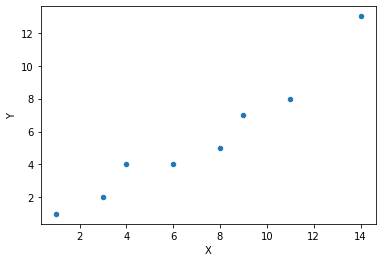

In [47]:
# Your code here.
data2.plot.scatter(x='X', y='Y')

plt.show()

In [48]:
#Regression
x = data2[['X']]
y = data2['Y']

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

display(mean_squared_error(result.predict(x),y))
display(result.score(x,y))



-0.43939393939393945

array([0.84848485])

0.8712121212121214

0.9316696375519905

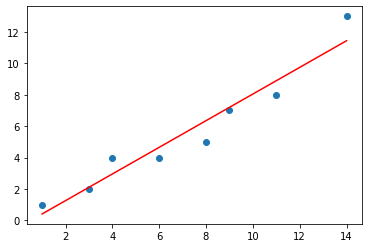

In [49]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [50]:
# Your response here. 

#It tells us that the more people are invited, the more people who will come to the party.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<AxesSubplot:>

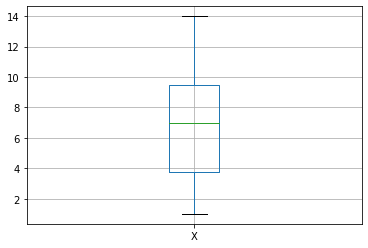

In [51]:
# Your response here. 

data2.boxplot(column='X')


In [52]:
#It seems that 14 is in the frontier of being considered an outlier.

In [53]:
data2.drop(index=7, inplace=True)
data2

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [54]:
x = data2[['X']]
y = data2['Y']

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

display(mean_squared_error(result.predict(x),y))
display(result.score(x,y))

0.32330827067669077

array([0.68421053])

0.3050483351235232

0.9433811802232854

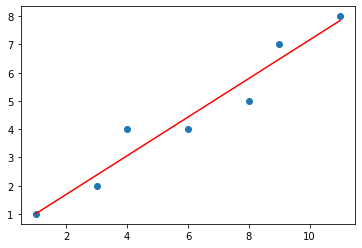

In [55]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [56]:
#The R2 increased, whice indicates a better fiting. The X explains 94,33% of the Y